# Making plots with plotnine

## Importing plotnine package

plotnine is not included in anaconda, need to install independently.

In [2]:
%matplotlib inline
import plotnine as p9
import pandas as pd
import os as os

# functions of plotnine and pandas are availabe using p9 and pd, respectively
pwd = os.getcwd()

os.chdir('/home/meelyn/Documents/cloud_development/sw-python-ecology-lesson/')
surveys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()
print(surveys_complete)

       record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
62            63      8   19  1977        3         DM   M             35.0   
63            64      8   19  1977        7         DM   M             37.0   
64            65      8   19  1977        4         DM   F             34.0   
65            66      8   19  1977        4         DM   F             35.0   
66            67      8   19  1977        7         DM   M             35.0   
...          ...    ...  ...   ...      ...        ...  ..              ...   
35540      35541     12   31  2002       15         PB   F             24.0   
35541      35542     12   31  2002       15         PB   F             26.0   
35542      35543     12   31  2002       15         PB   F             27.0   
35546      35547     12   31  2002       10         RM   F             15.0   
35547      35548     12   31  2002        7         DO   M             36.0   

       weight  
62       40.0  
63       48.0  
64 

## Plotting with plotnine

plotnine package uses the Grammar of Graphics (gg) to create complex plots from data in a dataframe.

plotnine graphics are built step by step by adding new elements on top of each other using the + operator. Putting the individual steps in brackets() provides Python-compatible syntax.

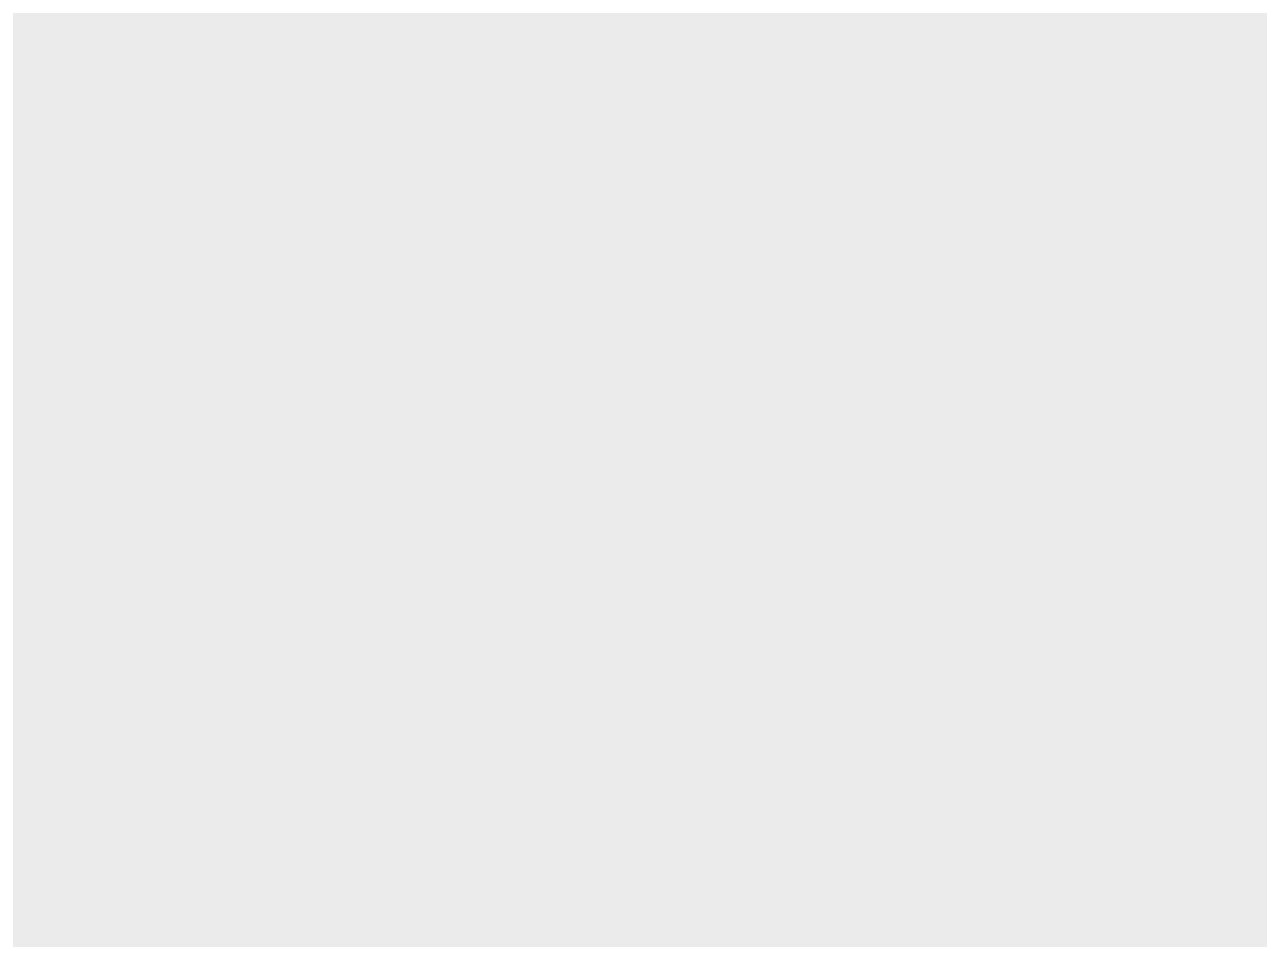

In [3]:
# bind the plot to a specific data frame using the data argument:

(p9.ggplot(data=surveys_complete))

# nothing is defined so it produces an empty plot

### Aesthetics (aes):

define aesthetics by selecting variables used in the plot and mapping them to a presentation such as plotting size, shape, color, etc. Interpret as which of the variables will influence the plotted objects/geometries.

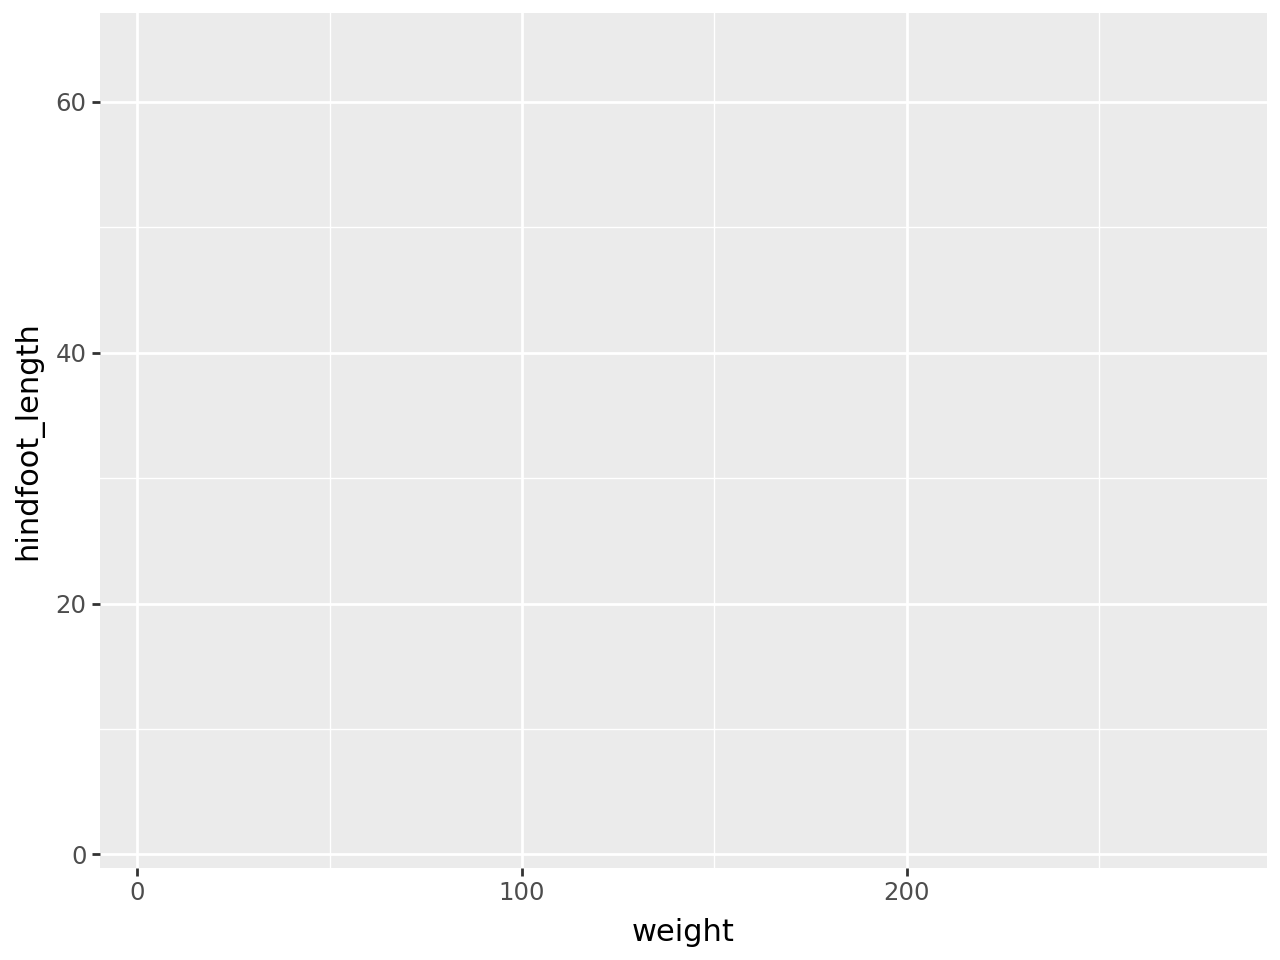

In [4]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length')))

The most important aes mappings are: x, y, alpha, color, colour, fill, linetype, shape, size, and stroke.

* still no specific data is plotted, we need to define what kind of geometry will be used for the plot. Points are the most straightforward way. Other options are lines, bars.

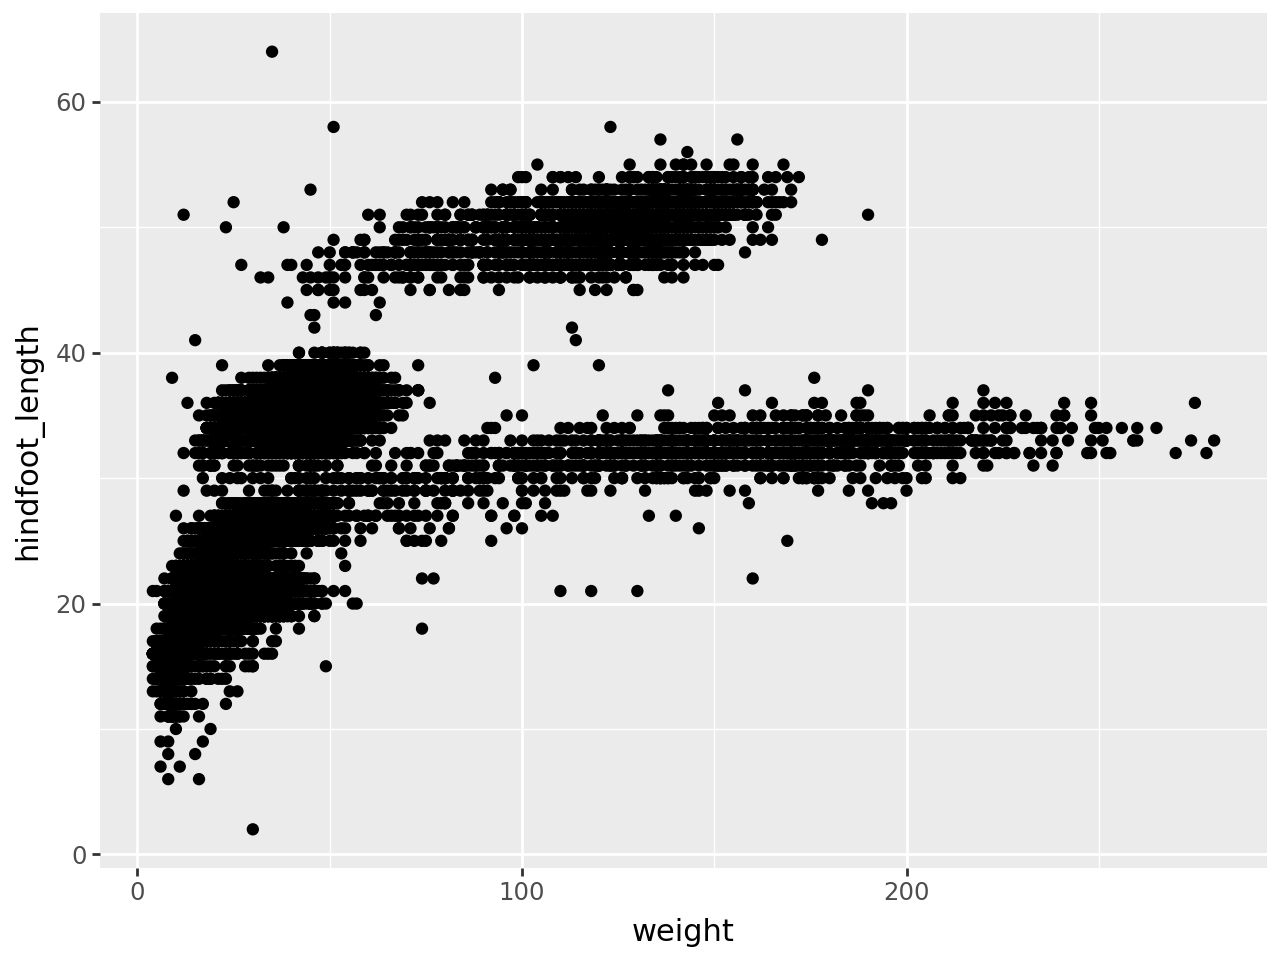

In [5]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length'))
        + p9.geom_point())

The + in the plotnine package is useful because it allows you to modify existing plotnine objects. 

You can easily set up plot templates and conveniently explore different types of plots.

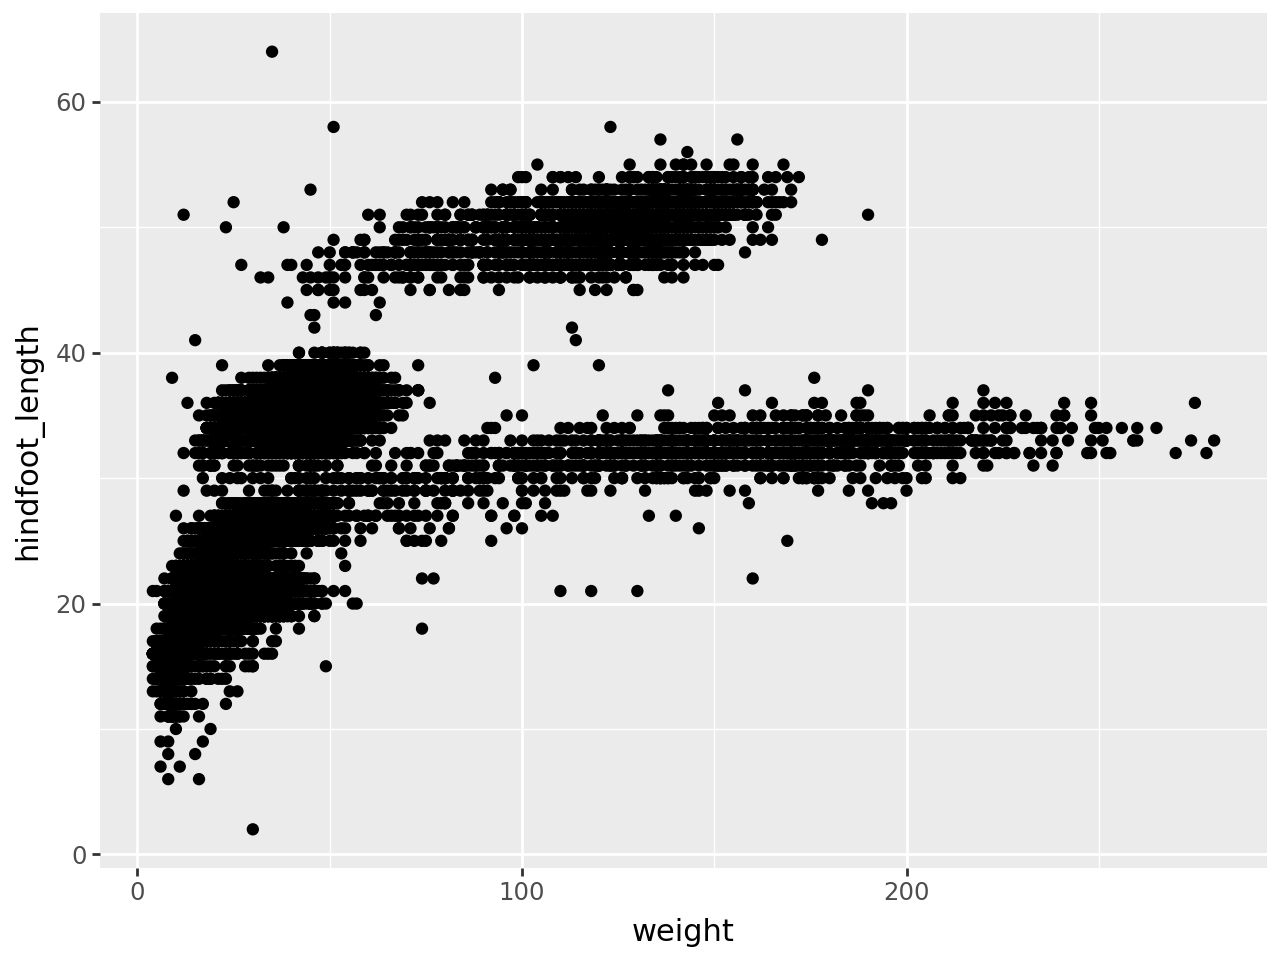

In [6]:
# create
surveys_plot=  p9.ggplot(data=surveys_complete,
                        mapping=p9.aes(x='weight',
                                       y='hindfoot_length'))

# draw the plot, adding the geom_point here instead of the above code
surveys_plot + p9.geom_point()

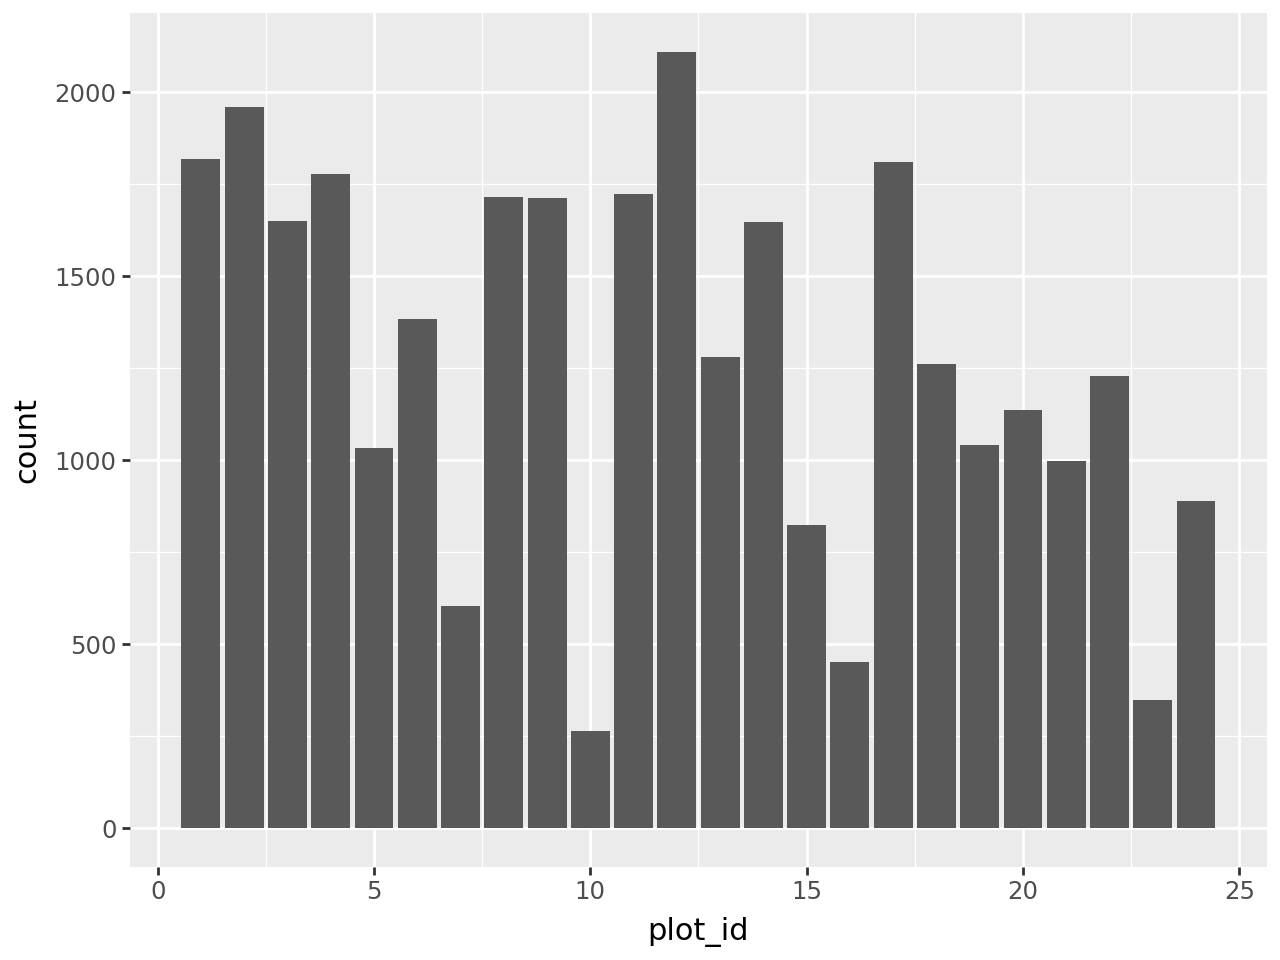

In [7]:
# Challenge - Bar Chart
## create a bar-plot that counts the number of record for each plot.

# bar_chart = p9.ggplot(data=surveys_complete)
# bar_chart + p9.geom_bar(p9.aes(x='plot_id'))

# OR
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id'))
    + p9.geom_bar())

### Notes

- anything you put in the ggplot() function can be seen by any geom layers that you add (universal plot seetings). That includes teh x and y axis you set up in aes().

- You can also specify aesthetics for a given geom independently of the aesthetics defined globally in the ggplot() function.

## Building your plots iteratively

Building plots with plotnine is typically an iterative process. We start by defining the dataset we'll use, lay the axes, and choose a geom.

elementary elements of a graph:
- data
- aes
- geom

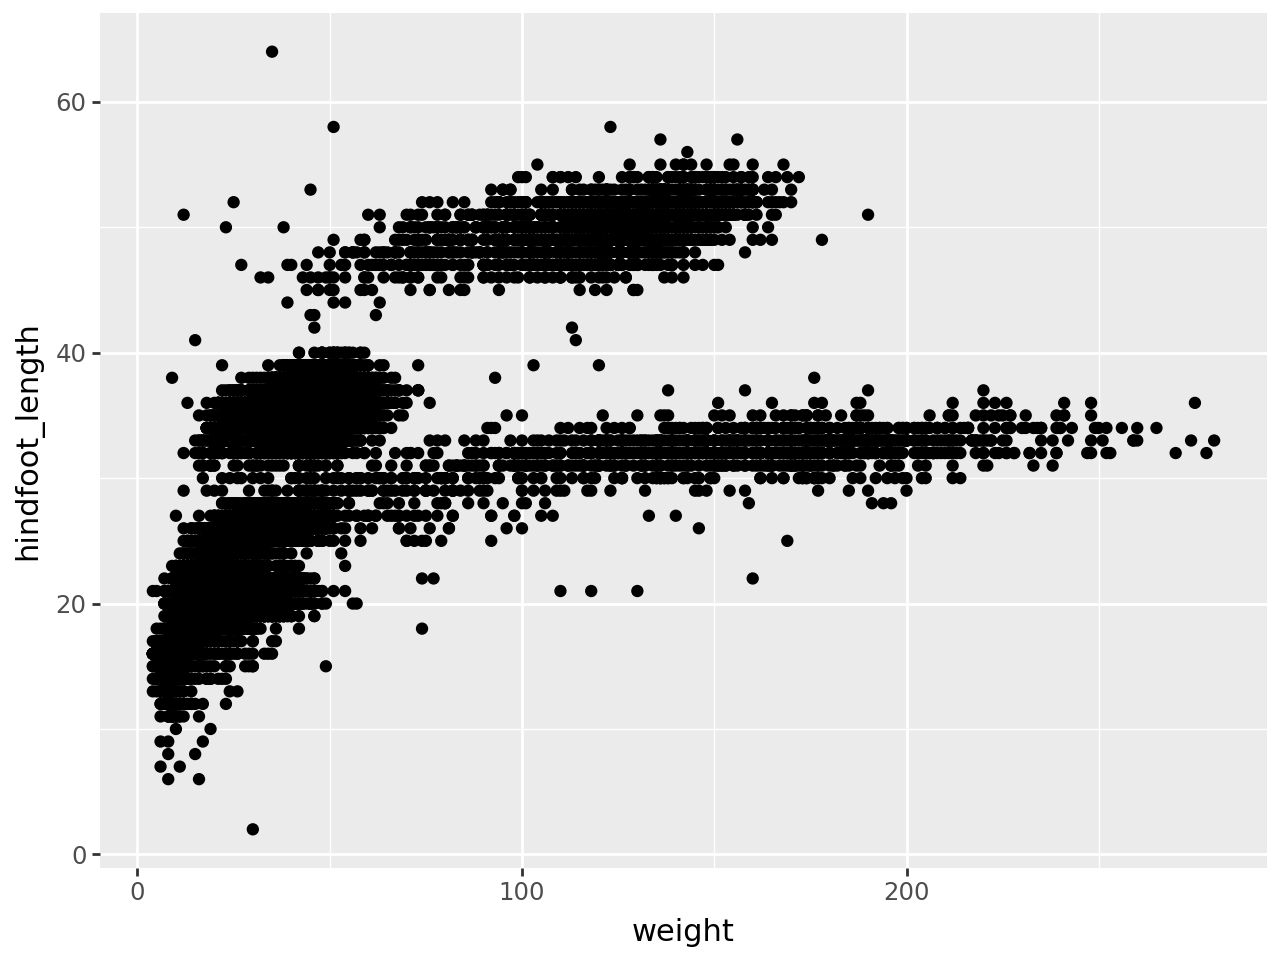

In [8]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
           + p9.geom_point()
)

Then, we start modifying this plot to extract more info from it.

## Add transparency (alpha) to avoid overplotting:

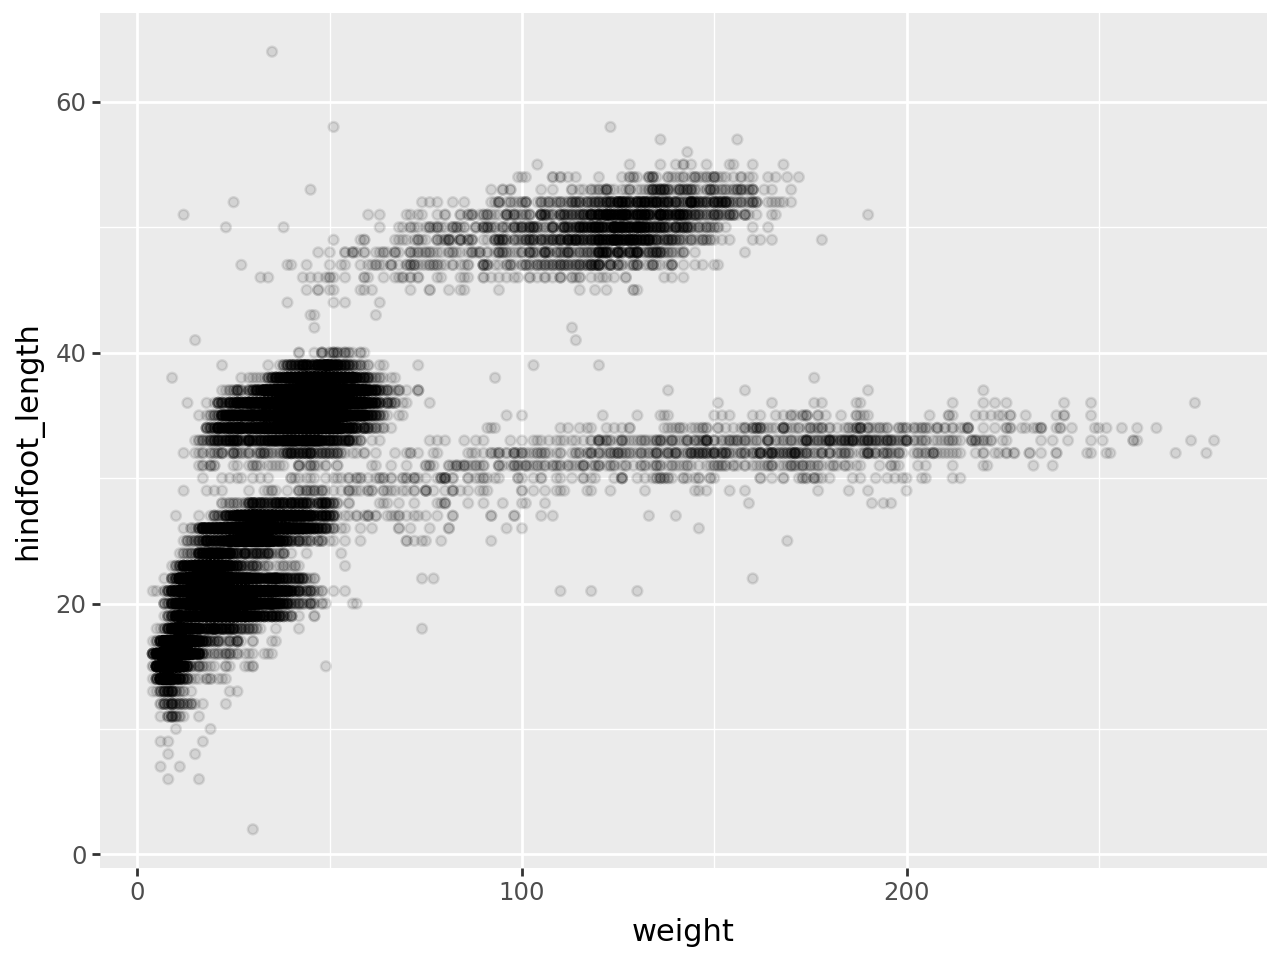

In [10]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(alpha=0.1)
)

## Add colors to all the points

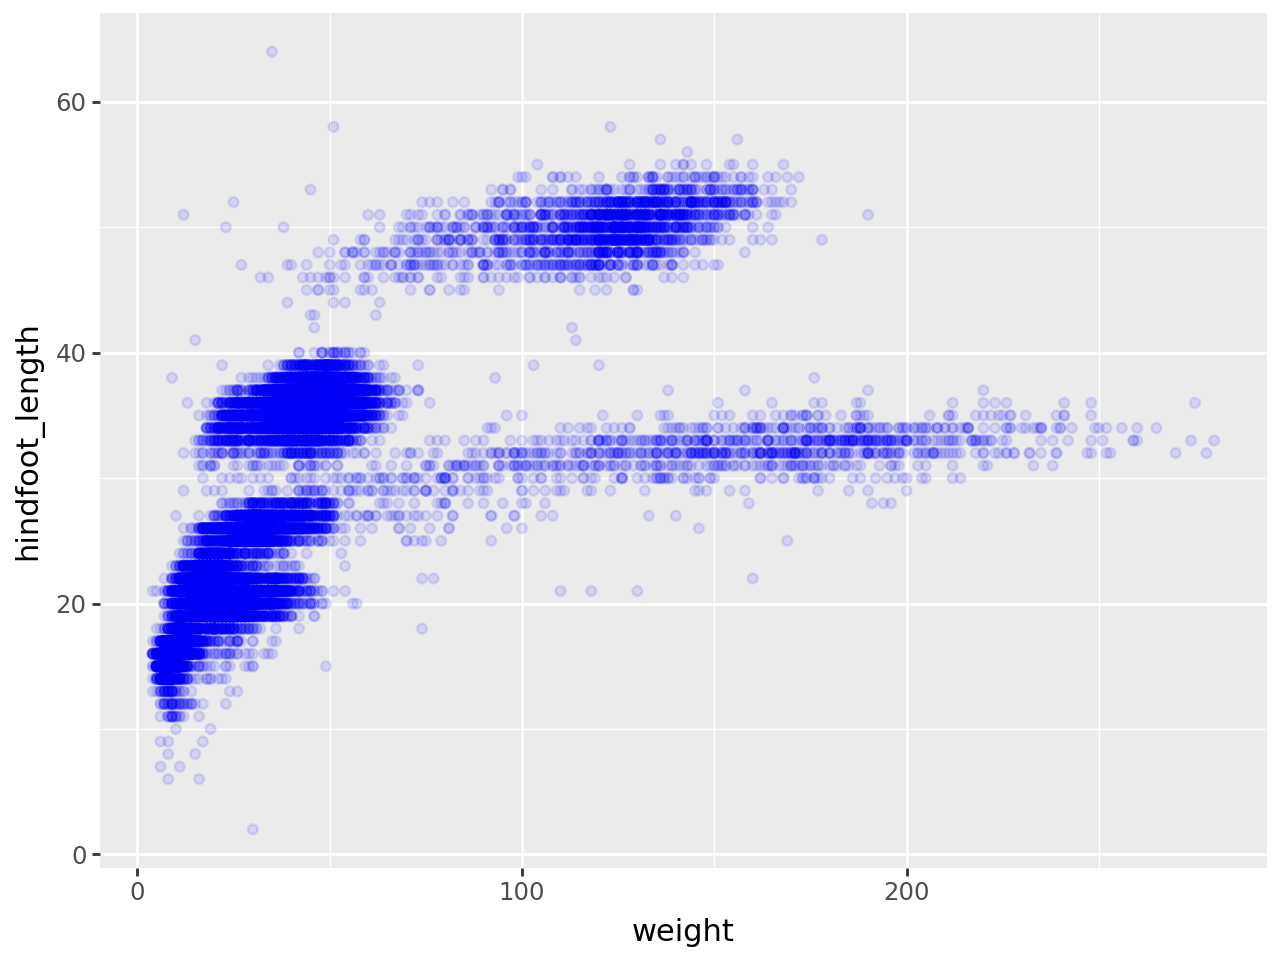

In [11]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(alpha=0.1, color='blue')
)

## Or to color each species in the plot differently, map the species_id column to the color aesthetic:

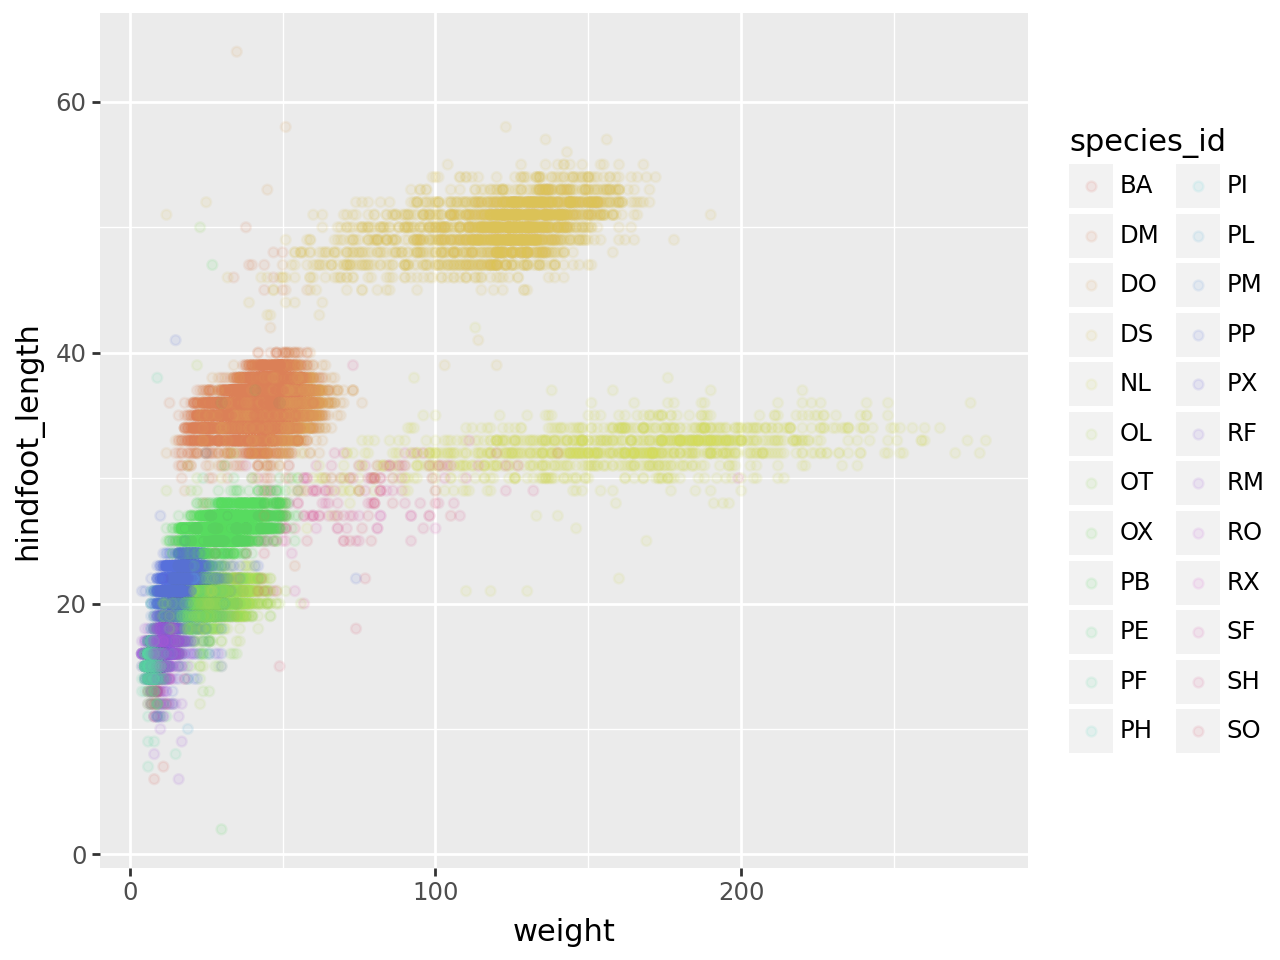

In [12]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
)

## Change labels

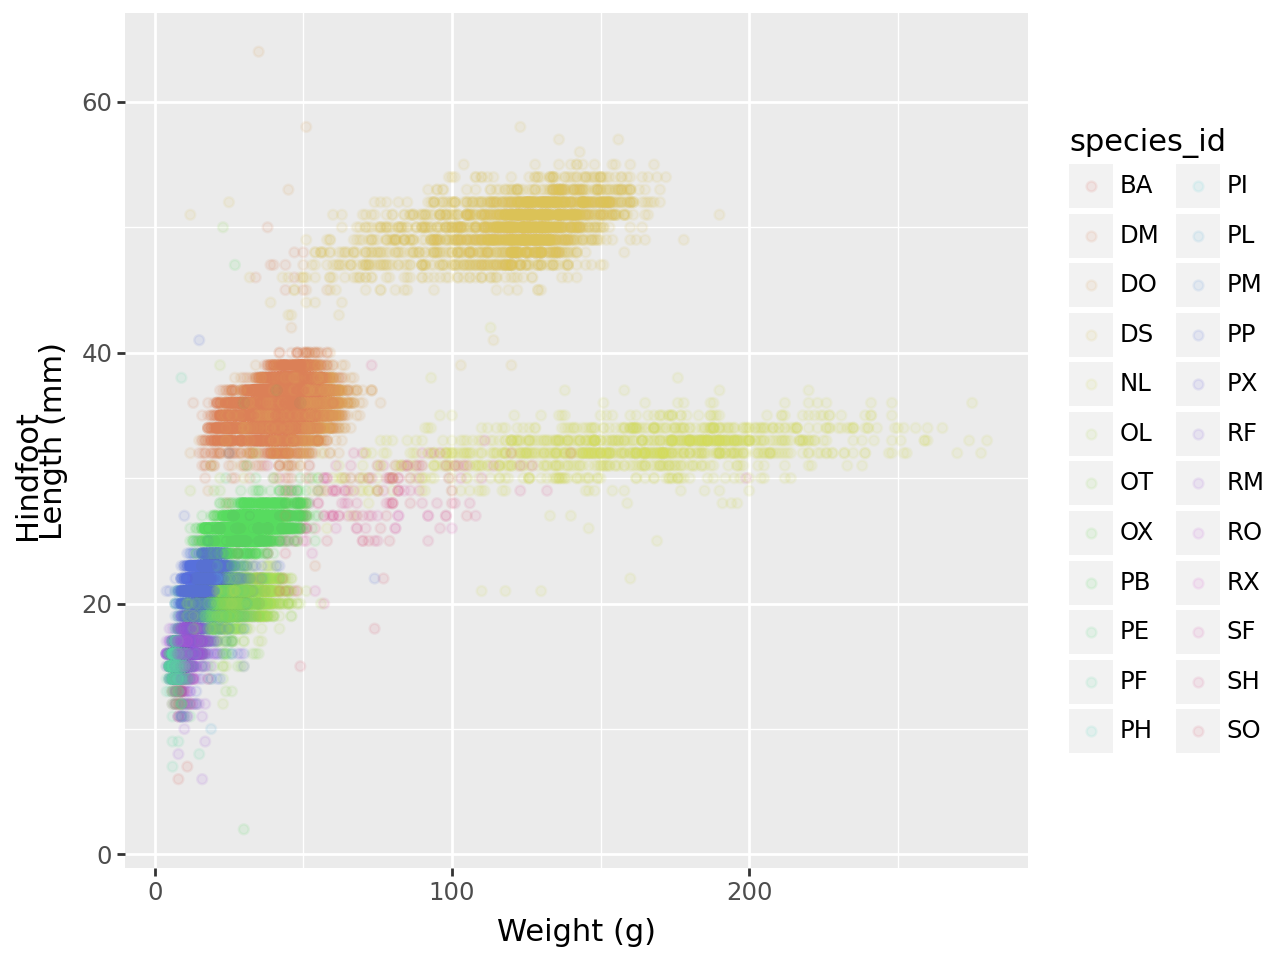

In [14]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id')) # makes each species have its own color, legend on right
    + p9.geom_point(alpha=0.1)
    + p9.xlab('Weight (g)')
    + p9.ylab('Hindfoot\nLength (mm)')
)

## Defining scale for colors, axes, etc.
### I.e. a log-version of the x-axis could support the interpreation of the lower numbers

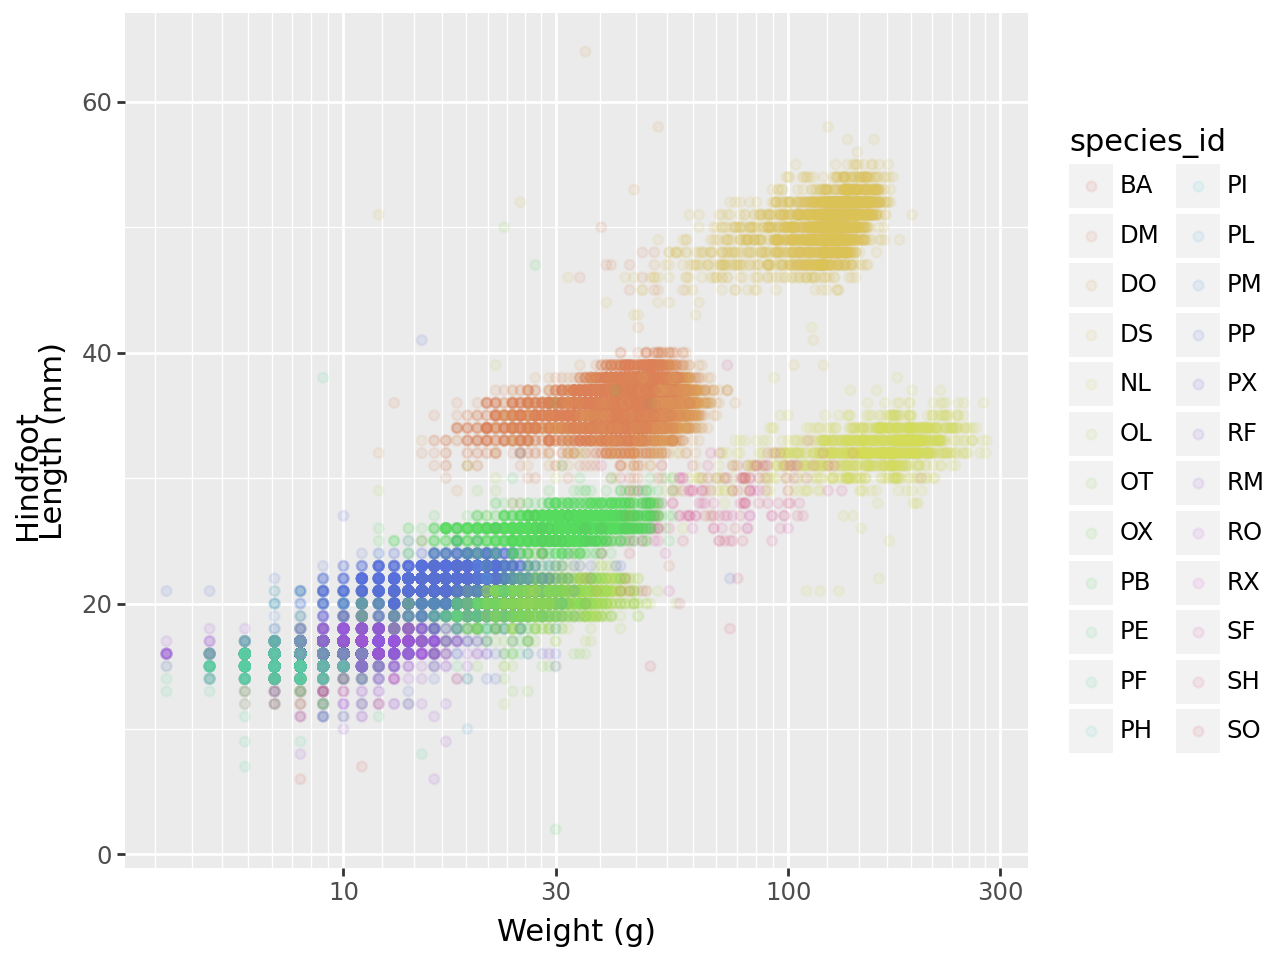

In [15]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
+ p9.geom_point(alpha=0.1)
+ p9.xlab('Weight (g)')
+ p9.ylab('Hindfoot\nLength (mm)')
+ p9.scale_x_log10()) # sets x-axis on the log scale

## Changing the theme (theme_*) or some specific theming (theme) elements. Usually plots with white background look more readable when printed.

## Set background to white using the function theme_bw()

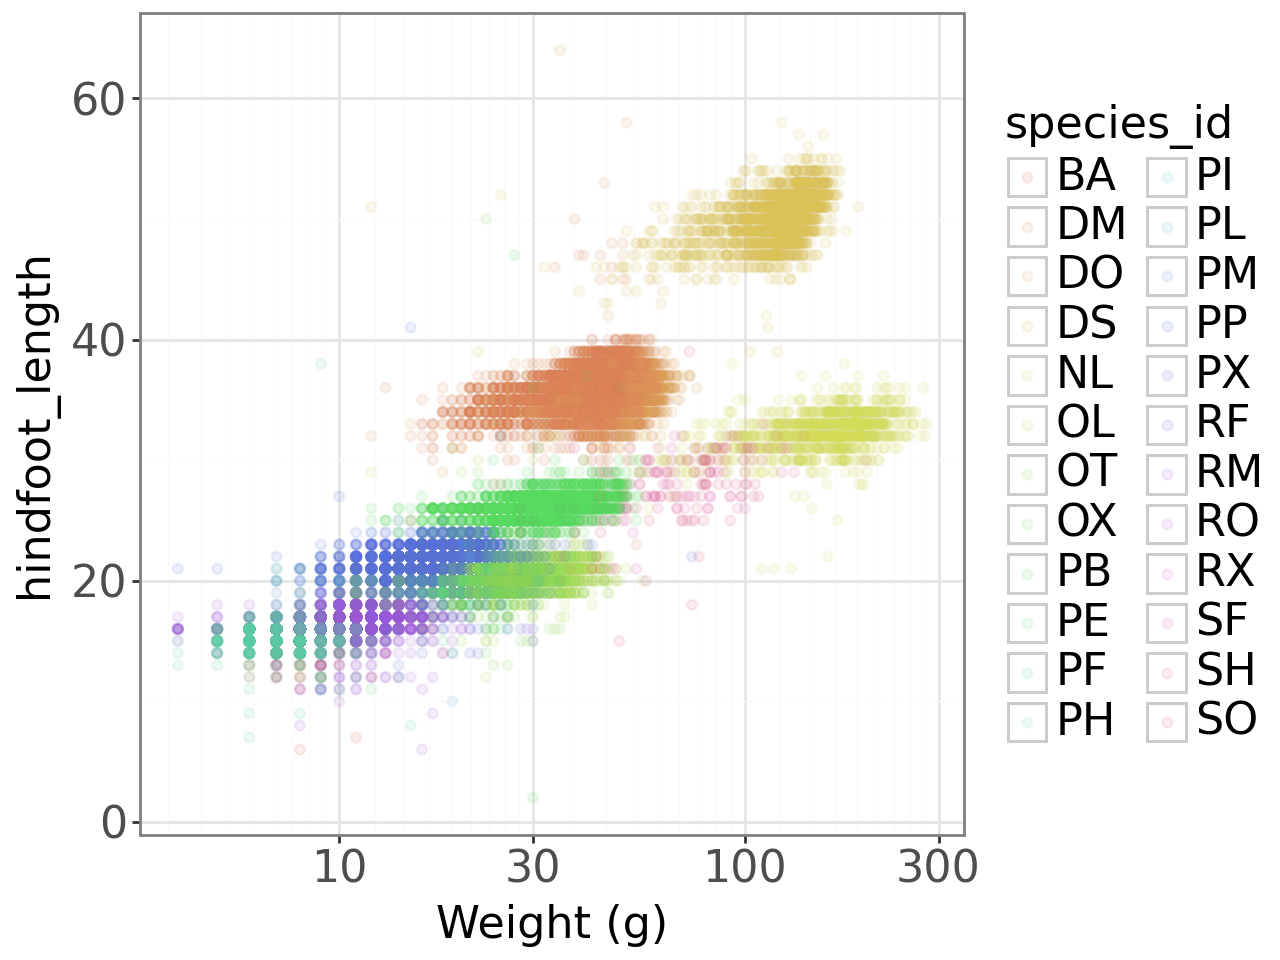

In [16]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab('Weight (g)')
    + p9.scale_x_log10()
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16)) # changes text size
)

### Challenge - Bar plot adaptations

adapt the bar plot of the previous exercise by mapping the <b>sex</b> variable to the color fill of teh bar chart.

Change the <b>scale</b> of the color fill by providing the colors blue and orange manually.

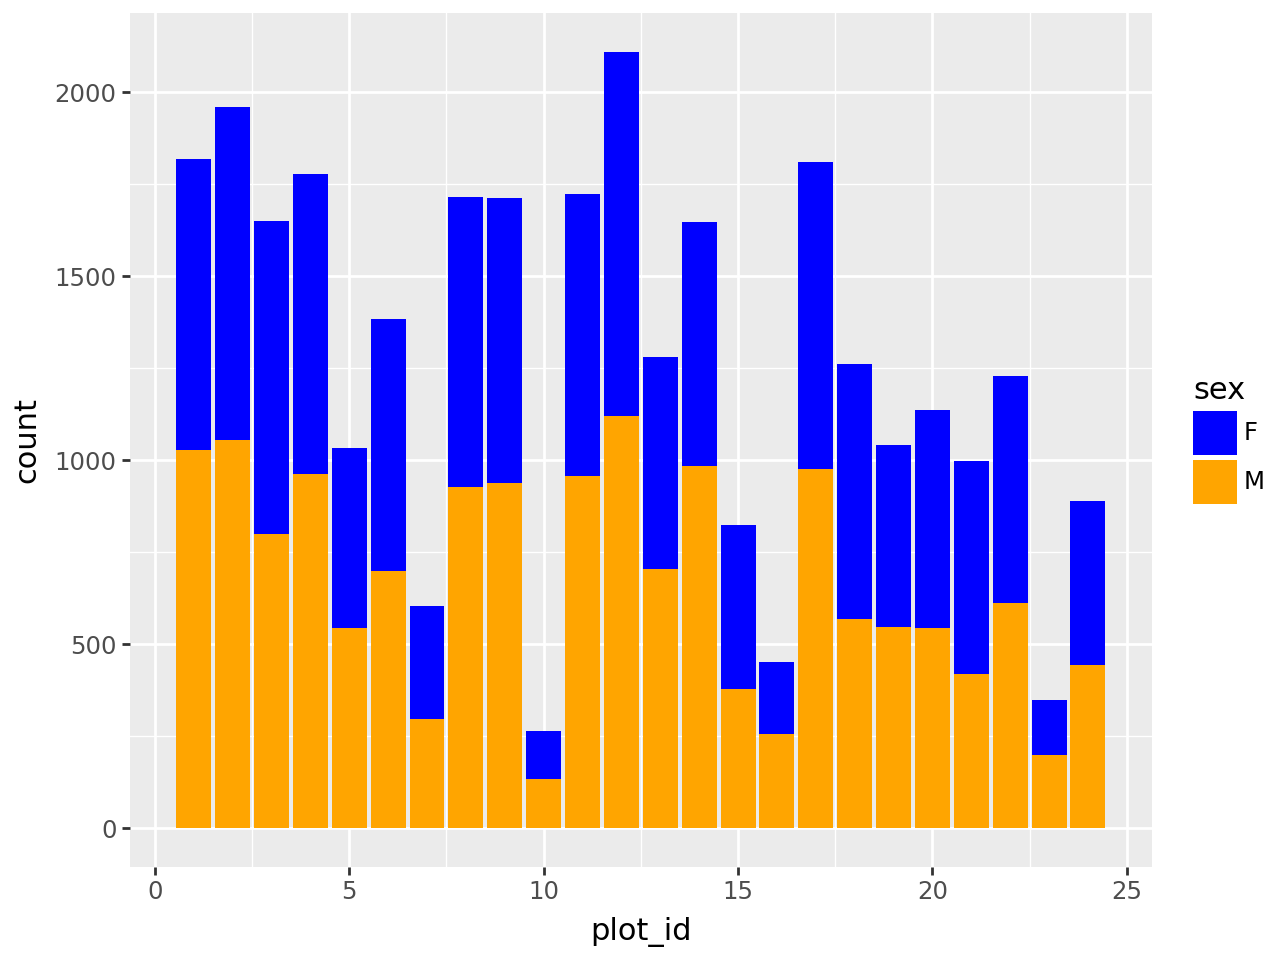

In [25]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id',
                          fill='sex'))
    + p9.geom_bar()
    + p9.scale_fill_manual(['blue', 'orange']) # use the scale_fill_manual option to change the fill colors
)

## Plotting distributions

Visualizing distributions is a common task during data exploration and analysis. To visualize the distribution of `weight` within each `species_id` group, a boxplot can be used:

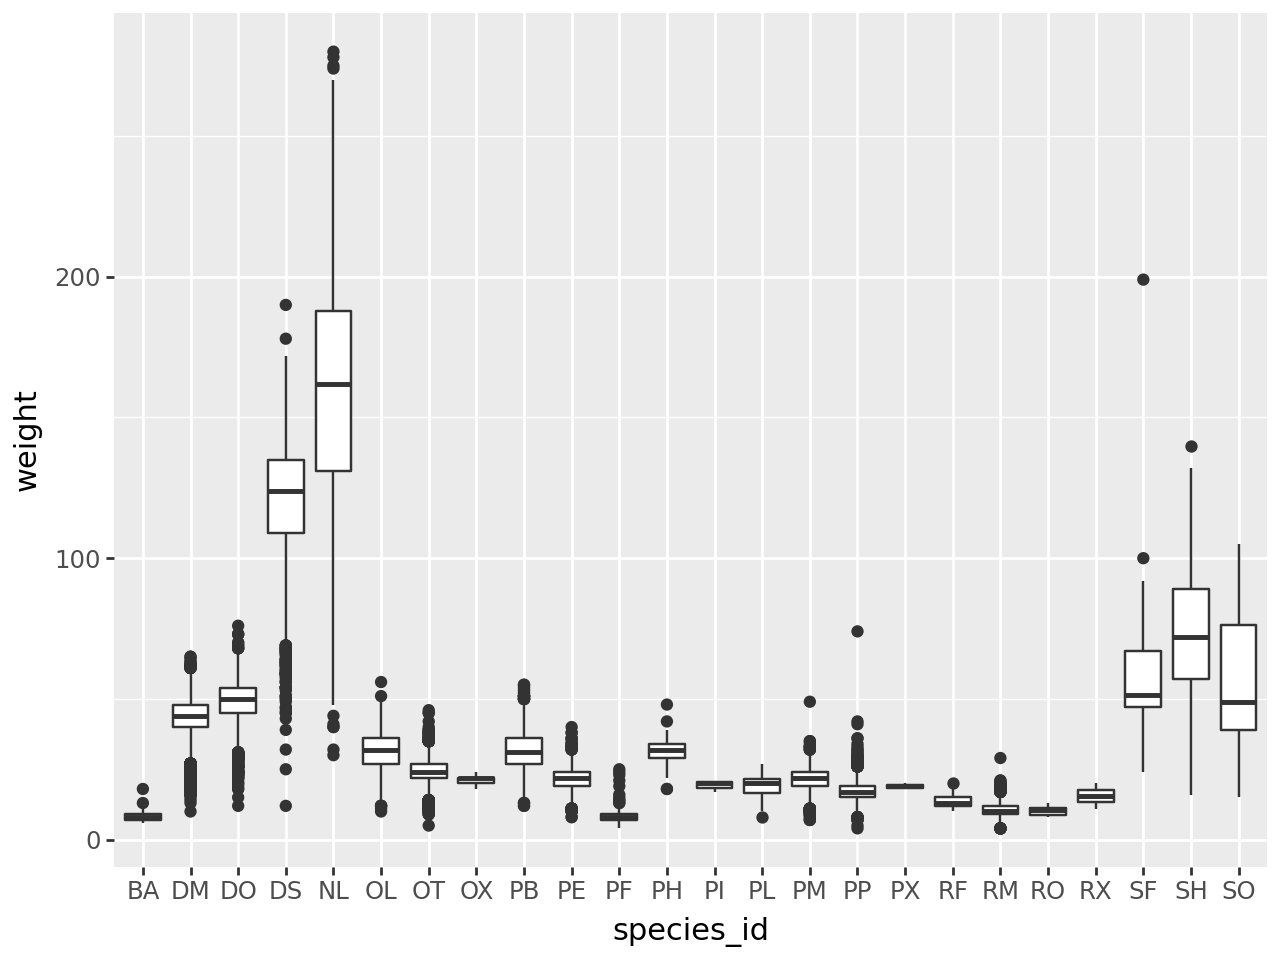

In [26]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
        + p9.geom_boxplot() # geom element to create a box plot
)

By adding points of the individual observations to the boxplot, we can have a better idea of the number of measurements and their distribution.

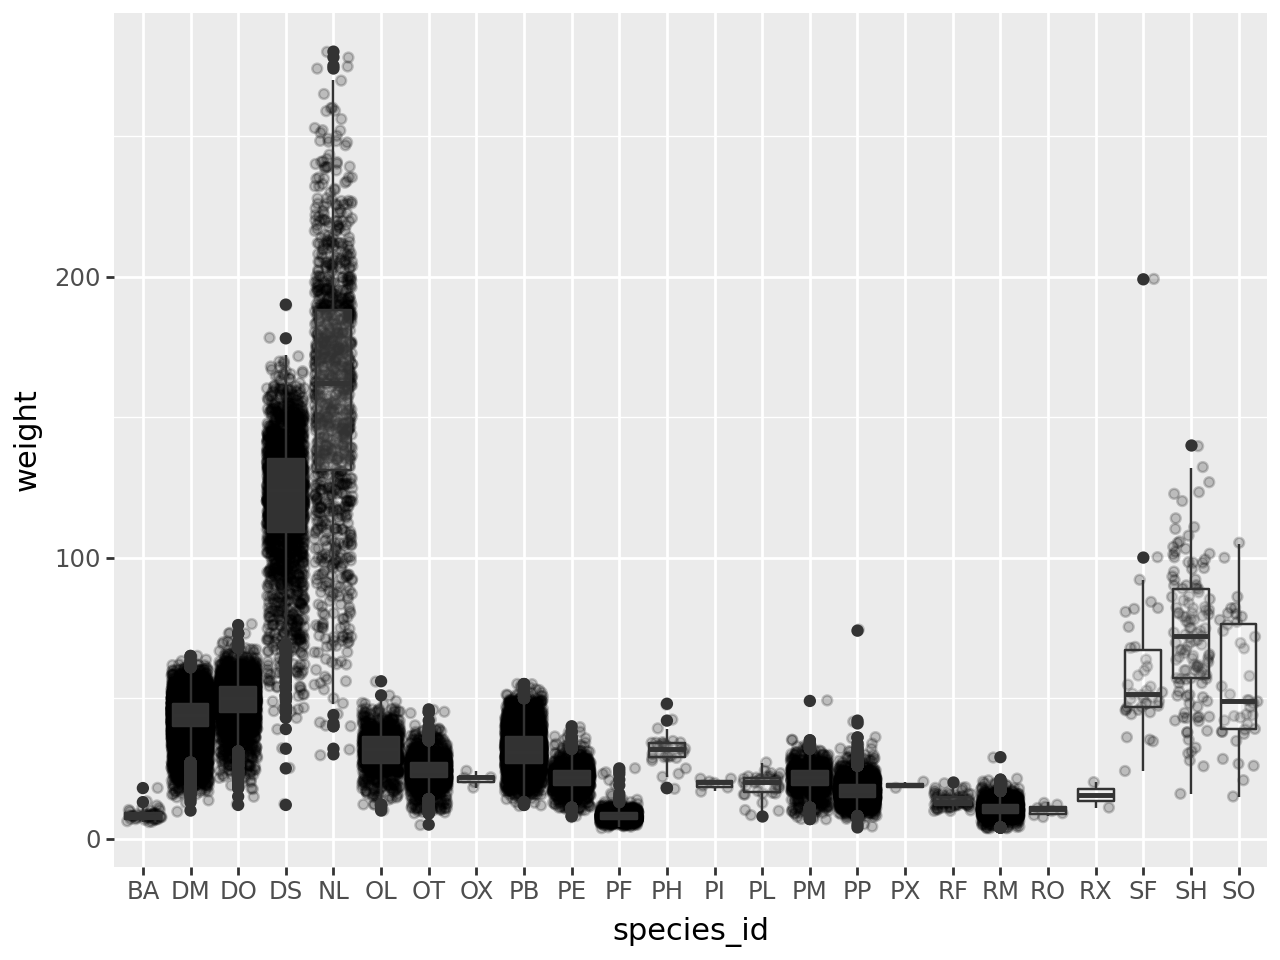

In [27]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_jitter(alpha=0.2) # add jitter to see individual points
    + p9.geom_boxplot(alpha=0.2) # make more transparent to see individual points better
)

### Challenge - distributions

Violin plot

Important to consider the scale of the observations.

- replace the box plot with a violin plot, see geom_violin()
- represent weighton the log10 scale, see scale_y_log10()
- add color to the datapoints on your boxplot ccording to the plot from which the sample was taken (plot_id)

hint: check the class for plot_id. by using factor() within the aes mapping of a variable, plotnine will handle the values as category values

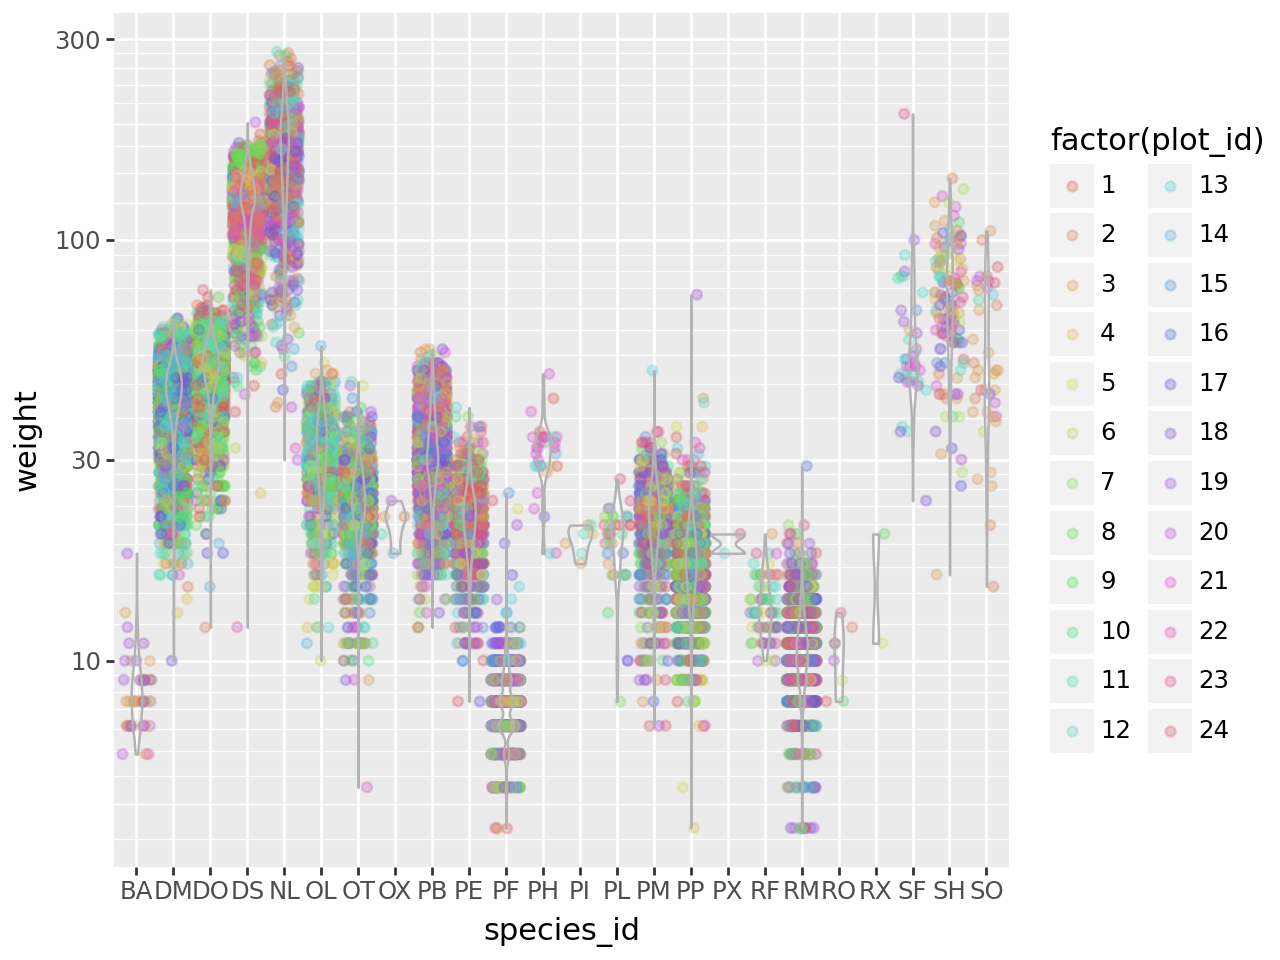

In [34]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight',
                          color='factor(plot_id)'))
    + p9.geom_jitter(alpha=0.3)
    + p9.geom_violin(alpha=0, color='0.7')
    + p9.scale_y_log10()
)

## Plotting time series data

Let's calculate the number of counts per year for each species. To do that we need to group data first and count the species `(species_id)` within each group.

In [40]:
yearly_counts = surveys_complete.groupby(['year', 'species_id'])['species_id'].count()
yearly_counts

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64

When checking the result of the previous calculation, we actually have both the `year` and the `species_id` as a row index. We can reset this index to use both as a column variable:

In [41]:
yearly_counts = yearly_counts.reset_index(name='counts')  # resets index so year and species become columns rather than indeces
yearly_counts

year species_id  counts
0    1977         DM     181
1    1977         DO      12
2    1977         DS      29
3    1977         OL       1
4    1977         OX       2
..    ...        ...     ...
327  2002         PP     375
328  2002         RM      20
329  2002         RO       7
330  2002         SF       5
331  2002         SH       9

[332 rows x 3 columns]

Timelapse data can be visualized as a line plot `(geom_line)` with years on `x axis` and counts on `y axis`

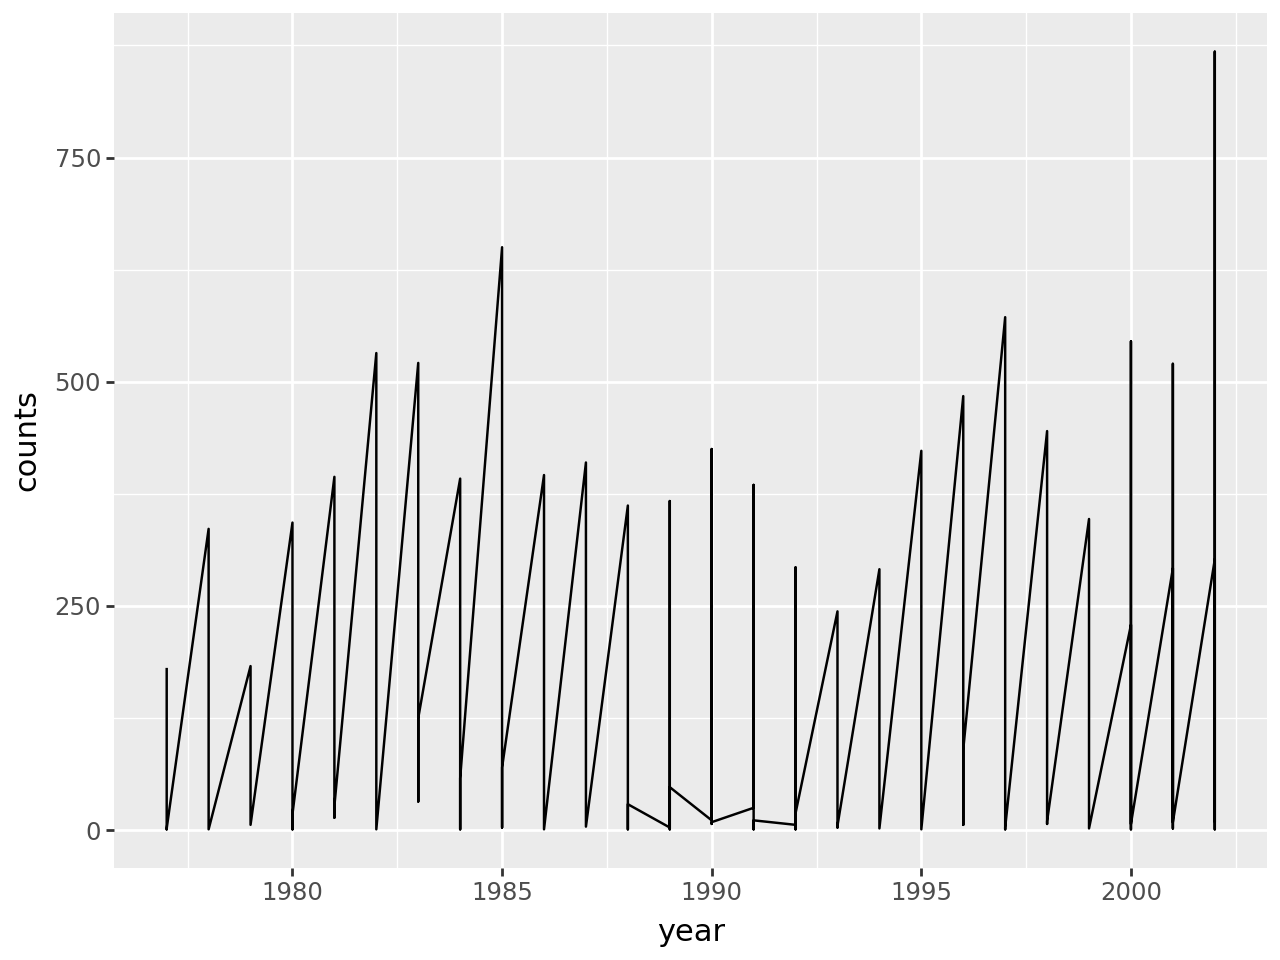

In [42]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts'))
    + p9.geom_line()
)

Above is a plot of all the species together. We need to plot a line for each individual species by modifying the aesthetic function and map the `species_id` to color.

     year species_id  counts
0    1977         DM     181
1    1977         DO      12
2    1977         DS      29
3    1977         OL       1
4    1977         OX       2
..    ...        ...     ...
327  2002         PP     375
328  2002         RM      20
329  2002         RO       7
330  2002         SF       5
331  2002         SH       9

[332 rows x 3 columns]


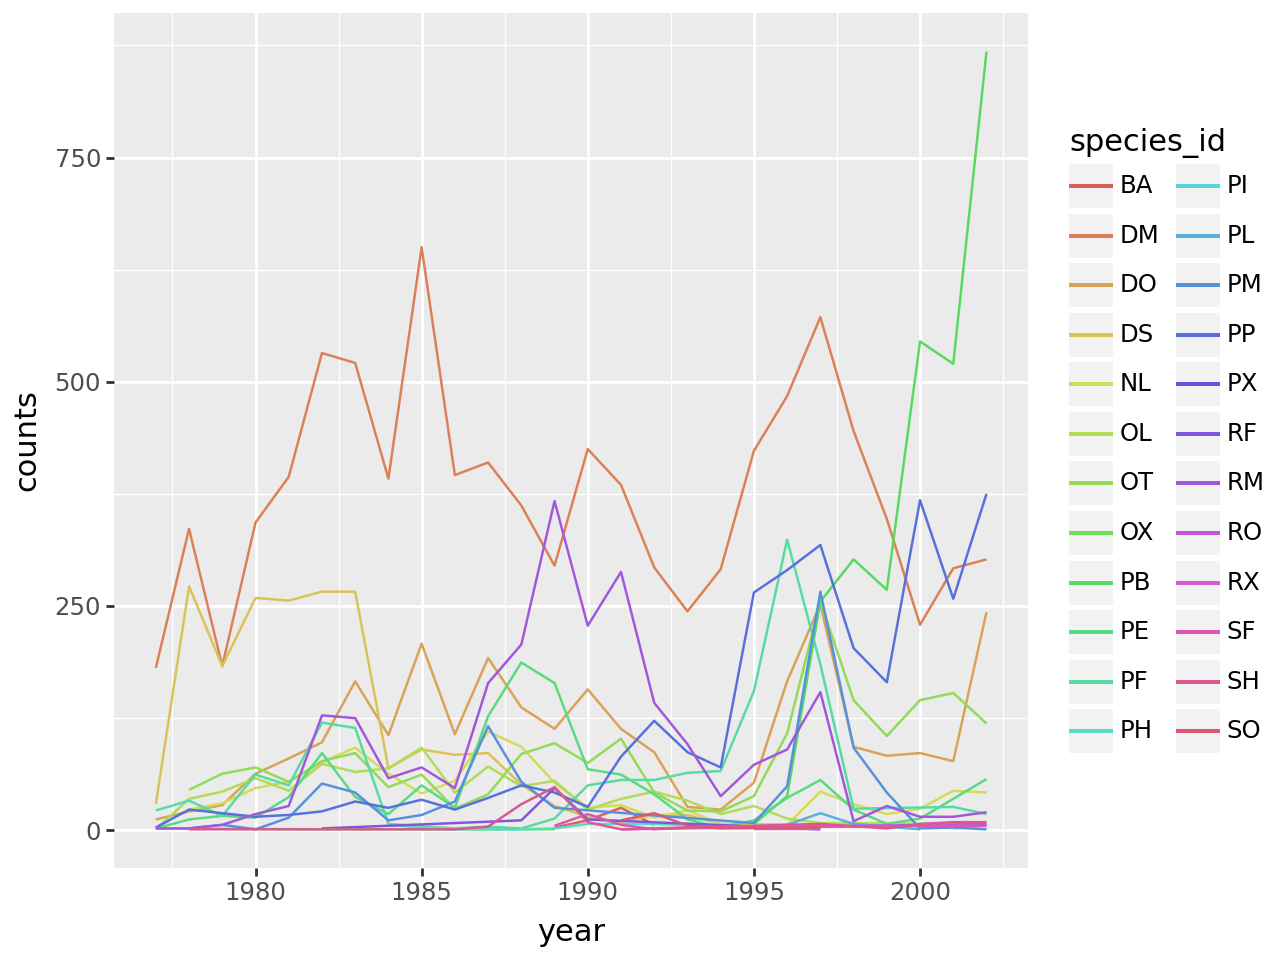

In [45]:
print(yearly_counts)
(p9.ggplot(data=yearly_counts, # dataframe is not in quotes! only column names and functions
           mapping=p9.aes(x='year',
                          y='counts',
                          color='species_id'))
    + p9.geom_line()
)

## Faceting

As any other library supporting the Grammar of Graphics, `plotnine` has a special technique called <i>faceting</i> that allows to split one plot into multiple plots based on a factor variable included in the dataset.

Consider our scatter plot of the `weight` versus the `hindfoot_length` from the previous sections:

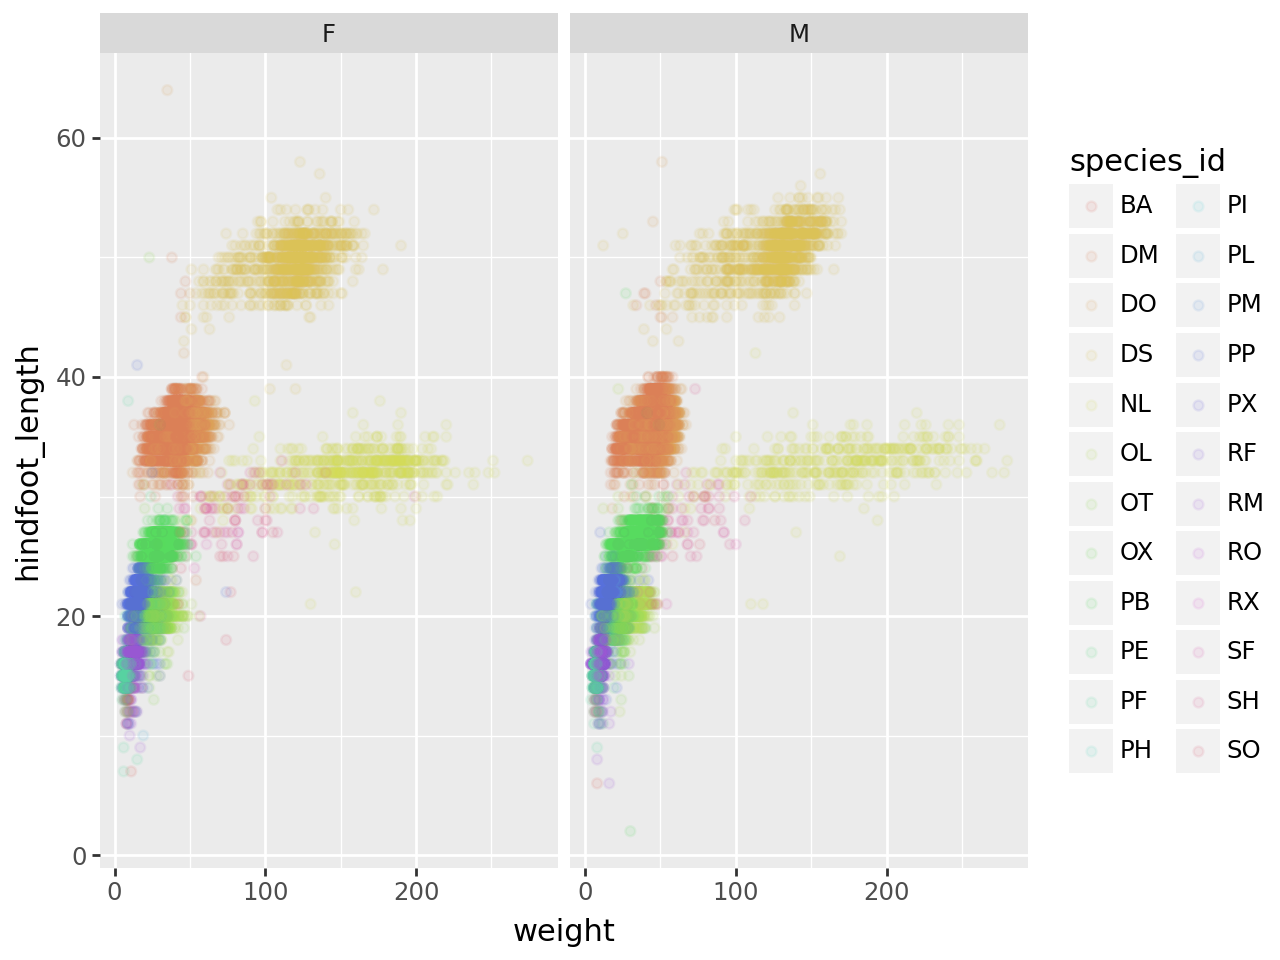

In [47]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap('sex')
)